<a href="https://www.kaggle.com/concyclics/people-s-daily-wordcloud-visualization?scriptVersionId=89570145" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# People's Daily WordCloud Visualization
#### Author: Concyclics

## Content
In this notebook, we are going to use jieba to split chinese words and use *wordcloud* to generate a visualization of news keyword like below.
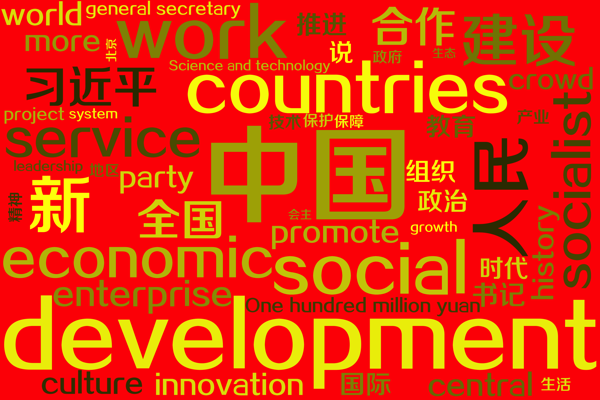

And also we will use *zhon* and some other method to clean the word data.

## 1. Load and split

### 1.1 Load newspath

In [1]:
import os

newspath=[]
for dirname, _, filenames in os.walk('../input/renmindaily/data'):
    for filename in filenames:
        newspath.append(os.path.join(dirname, filename))

print("total news: ",len(newspath))

total news:  29541


### 1.2 Preview of news

In [2]:
from random import sample
for eachpath in sample(newspath,k=2):
    print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print(news)
        print('\n\n')
    

path:  ../input/renmindaily/data/RenMin_Daily/20210206-06-05.txt

全国总工会十七届四次执委会议召开

　　本报北京2月5日电  （记者易舒冉）全国总工会十七届四次执委会议4日至5日在北京召开。会议传达学习了中央书记处指示精神。全国人大常委会副委员长、中华全国总工会主席王东明主持会议并讲话。
　　王东明指出，各级工会要以习近平新时代中国特色社会主义思想为指导，胸怀“两个大局”，自觉把工会工作放到党和国家大局中去推进；加强理论武装，把牢正确政治方向；增强政治意识，提高政治判断力、政治领悟力、政治执行力；勇于改革创新，推动工会工作创新发展；转变工作作风，提高工作能力水平，以优异成绩庆祝建党100周年。
　　会议履行了有关人事事项的民主程序，审议通过了组织动员广大职工为实现“十四五”规划和二〇三五年远景目标建功立业的决议。
　　全总党组书记、副主席、书记处第一书记陈刚作工作报告。




path:  ../input/renmindaily/data/RenMin_Daily/20210325-03-05.txt

“相信中国的明天会更好”

　　中国脱贫攻坚战取得全面胜利，俄罗斯瓦维洛夫植物遗传资源研究所遗传学系主任叶辅根·雷德钦科感到振奋。这位国际植物病虫害防治专家感慨道：“中国人民以自己的才干和辛勤战胜了贫困。”
　　雷德钦科积极参与了兰考的减贫工作。由于自然条件恶劣，河南开封兰考曾是中国出名的贫困县，2002年被确定为国家级扶贫开发工作重点县。2005年，受当地农业专家之邀，雷德钦科来到兰考。“当地小麦种植一直深受蚜虫侵扰之苦。我告诉大家，培育小麦新品种是防治蚜虫最经济环保的方法。”前往中国之前，这位俄罗斯专家已经仔细“备了课”。
　　刚到兰考，雷德钦科就扎进麦田，开展田间调查研究。“土地的利用率很高。勤劳的农民在最小块的土地上都种植了小麦，田间没有杂草。”这是他对中国农村的第一印象。同时雷德钦科也发现，因缺少作物轮作等，害虫在田间繁殖传播。
　　从那时开始，一心想为中国农民培育抗蚜小麦新品种的雷德钦科，几乎每年都来河南。他被开封市政府聘为顾问，为当地培训大量农业技术人员。在他推荐下，俄罗斯科学院、国家农科院等机构近10位专家来到开封参与超级小麦育种研究。
　　雷德钦科和兰考的河南天民种业公司长期合

### 1.3 View the split of JieBa

In [3]:
import jieba

from random import sample
for eachpath in sample(newspath,k=1):
    #print("path: ", eachpath)
    with open(eachpath,'r') as f:
        news=f.read()
        print('origin news: ')
        print(news)
        
        print('split by simple mode: ')
        print("/".join(jieba.lcut(news)))
        
        print('split by cut_all mode: ')
        print("/".join(jieba.lcut(news, cut_all=True)))
        
        print('split by search mode: ')
        print("/".join(jieba.lcut_for_search(news)))

Building prefix dict from the default dictionary ...


origin news: 

全国人大常委会企业破产法执法检查组举行第二次全体会议

　　新华社北京7月21日电  全国人大常委会企业破产法执法检查组21日举行第二次全体会议，研究讨论执法检查报告稿，部署有关工作。全国人大常委会副委员长王东明、郝明金出席。
　　在听取执法检查组成员和国务院有关部门意见建议后，王东明指出，企业破产法执法检查是深入贯彻习近平法治思想、进一步改善营商环境、助力高质量发展的重要举措。这次执法检查聚焦重点难点问题，创新方式方法，将执法检查与修法工作紧密结合，取得积极成效。要进一步贯彻落实党中央重大决策部署，认真研究采纳有关方面意见建议，全力以赴做好后续工作，确保执法检查取得实效。要加大法律实施力度，把做好企业破产工作放到统筹“两个大局”、构建新发展格局当中谋划推进，为促进高质量发展提供法律保障。

split by simple mode: 


Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.280 seconds.
Prefix dict has been built successfully.



/全国人大常委会/企业/破产法/执法/检查组/举行/第二次/全体会议/
/
/　/　/新华社/北京/7/月/21/日电/ / /全国人大常委会/企业/破产法/执法/检查组/21/日/举行/第二次/全体会议/，/研究/讨论/执法检查/报告稿/，/部署/有关/工作/。/全国人大常委会/副委员长/王东明/、/郝明金/出席/。/
/　/　/在/听取/执法检查/组成员/和/国务院/有关/部门/意见建议/后/，/王东明/指出/，/企业/破产法/执法检查/是/深入/贯彻/习近平/法治/思想/、/进一步/改善/营商/环境/、/助力/高质量/发展/的/重要/举措/。/这次/执法检查/聚焦/重点难点/问题/，/创新/方式/方法/，/将/执法检查/与/修法/工作/紧密结合/，/取得/积极/成效/。/要/进一步/贯彻落实/党中央/重大/决策/部署/，/认真/研究/采纳/有关/方面/意见建议/，/全力以赴/做好/后续/工作/，/确保/执法检查/取得实效/。/要/加大/法律/实施/力度/，/把/做好/企业破产/工作/放到/统筹/“/两个/大局/”/、/构建/新/发展/格局/当中/谋划/推进/，/为/促进/高质量/发展/提供/法律/保障/。/

split by cut_all mode: 
/
//全国/全国人大/全国人大常委会/国人/人大/人大常委会/常委/常委会/委会/企业/企业破产/破产/破产法/执法/执法检查/检查/检查组/举行/第二/第二次/二次/全体/全体会议/体会/会议//
//
//　//　//新华/新华社/北京/7/月/21/日电// // //全国/全国人大/全国人大常委会/国人/人大/人大常委会/常委/常委会/委会/企业/企业破产/破产/破产法/执法/执法检查/检查/检查组/21/日/举行/第二/第二次/二次/全体/全体会议/体会/会议/，/研究/讨论/执法/执法检查/检查/检查报告/查报/报告/报告稿/，/部署/有关/工作/。/全国/全国人大/全国人大常委会/国人/人大/人大常委会/常委/常委会/委会/副委员长/委员/委员长/王东明/东明/、/郝/明/金/出席/。/
//　//　//在/听取/执法/执法检查/检查/检查组/组成/组成员/成员/和/国务/国务院/有关/部门/意见/意见建议/建议/后/，/王东明/东明/指出/，/企业/企业破产/破产/破产法/执法/执法检查

The search mode best fits what we want. It split each possible keywords.

### 1.4 remove space, number and punctuations

#### 1.4.1 remove punctuation before split

In [4]:
!pip install zhon

     |████████████████████████████████| 99 kB 964 kB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for zhon: filename=zhon-1.1.5-py3-none-any.whl size=84322 sha256=dd74de24f2e89cdc50cfc31fe68f1b5e1f07d4ec929be0f824df09096280e0fa
  Stored in directory: /root/.cache/pip/wheels/d0/56/17/2675c4c7413a72bf173062e8d0a16503e3b2607745aa84988d
Successfully built zhon


In [5]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def removePunctuation(s:str):
    s=re.sub(r"[%s]+" %puncZH, "",s)
    s=re.sub(r"[%s]+" %puncEN, "",s)
    s=re.sub(r"[\d\n\t\r]+", "",s)
    return s

In [6]:
from random import choice

news = open(choice(newspath),'r').read()
print(news)

党史学习教育中央宣讲团在四川西藏青海宣讲
自觉接受精神洗礼 满怀豪情奋发有为（奋斗百年路 启航新征程·学党史 悟思想 办实事 开新局）

　　本报成都3月26日电 （记者王明峰）党史学习教育中央宣讲团宣讲报告会25日上午在四川省成都市举行。中央宣讲团成员、中共中央党史和文献研究院原院务委员陈晋作宣讲报告。
　　报告会上，陈晋紧密围绕习近平新时代中国特色社会主义思想，解读了党的十八大以来习近平总书记对学习党的历史的重要论述；深刻阐述了认真组织开展好党史学习教育的重要意义；结合大量生动事例，尤其是四川本地的红色资源，对中国共产党百年奋斗历程、伟大贡献、理论创新等做了全面讲解；对深刻把握党史学习教育的内容进行了详细解读。他表示，开展党史学习教育要学懂弄通做实习近平新时代中国特色社会主义思想，增强“四个意识”、坚定“四个自信”、做到“两个维护”。报告会以电视电话会议形式召开，四川省各市（州），县（市、区）设分会场，全省共计3.5万人参会。
　　“听了报告会，进一步感受到党的创新理论的思想伟力，进一步增强了创新开拓的信心和决心，进一步感受到坚持党中央权威和集中统一领导的极端重要性，增强做到‘两个维护’的政治自觉、思想自觉和行动自觉。”四川省委党校副校长、教授裴泽庆说。
　　25日下午，陈晋来到西南交通大学，与师生代表进行座谈宣讲。26日他来到阿坝藏族羌族自治州汶川县映秀镇进行互动交流。
　　本报拉萨3月26日电 （记者袁泉、琼达卓嘎）党史学习教育中央宣讲团报告会26日上午在西藏自治区拉萨市举行。中央宣讲团成员、中央党史和文献研究院原副院长吴德刚作宣讲报告。
　　报告会上，吴德刚以生动的历史案例、详实的党史文献，阐释了党史学习“为什么学”“学什么”“怎么学”等问题。他围绕习近平总书记关于党的历史的重要论述，介绍了开展党史学习教育的重大意义；强调要认真研读党史基本著作，全面了解中国共产党百年奋斗的光辉历程和历史性贡献。围绕开展党史学习教育的重点，他强调要在学懂、弄通、做实上下功夫，进一步深入学习习近平新时代中国特色社会主义思想，增强“四个意识”、坚定“四个自信”、做到“两个维护”；要把党史学习、理论学习同总结经验、观照现实、推动工作结合起来，把学习成效转化为工作动力和实效；要进一步发扬好“老西藏精神”，抓住贯彻中央第七次西藏工作座谈会精神的历史机遇，将党史学习同回顾总结西藏和平解

In [7]:
print(removePunctuation(news))

党史学习教育中央宣讲团在四川西藏青海宣讲自觉接受精神洗礼 满怀豪情奋发有为奋斗百年路 启航新征程学党史 悟思想 办实事 开新局本报成都月日电 记者王明峰党史学习教育中央宣讲团宣讲报告会日上午在四川省成都市举行中央宣讲团成员中共中央党史和文献研究院原院务委员陈晋作宣讲报告报告会上陈晋紧密围绕习近平新时代中国特色社会主义思想解读了党的十八大以来习近平总书记对学习党的历史的重要论述深刻阐述了认真组织开展好党史学习教育的重要意义结合大量生动事例尤其是四川本地的红色资源对中国共产党百年奋斗历程伟大贡献理论创新等做了全面讲解对深刻把握党史学习教育的内容进行了详细解读他表示开展党史学习教育要学懂弄通做实习近平新时代中国特色社会主义思想增强四个意识坚定四个自信做到两个维护报告会以电视电话会议形式召开四川省各市州县市区设分会场全省共计万人参会听了报告会进一步感受到党的创新理论的思想伟力进一步增强了创新开拓的信心和决心进一步感受到坚持党中央权威和集中统一领导的极端重要性增强做到两个维护的政治自觉思想自觉和行动自觉四川省委党校副校长教授裴泽庆说日下午陈晋来到西南交通大学与师生代表进行座谈宣讲日他来到阿坝藏族羌族自治州汶川县映秀镇进行互动交流本报拉萨月日电 记者袁泉琼达卓嘎党史学习教育中央宣讲团报告会日上午在西藏自治区拉萨市举行中央宣讲团成员中央党史和文献研究院原副院长吴德刚作宣讲报告报告会上吴德刚以生动的历史案例详实的党史文献阐释了党史学习为什么学学什么怎么学等问题他围绕习近平总书记关于党的历史的重要论述介绍了开展党史学习教育的重大意义强调要认真研读党史基本著作全面了解中国共产党百年奋斗的光辉历程和历史性贡献围绕开展党史学习教育的重点他强调要在学懂弄通做实上下功夫进一步深入学习习近平新时代中国特色社会主义思想增强四个意识坚定四个自信做到两个维护要把党史学习理论学习同总结经验观照现实推动工作结合起来把学习成效转化为工作动力和实效要进一步发扬好老西藏精神抓住贯彻中央第七次西藏工作座谈会精神的历史机遇将党史学习同回顾总结西藏和平解放周年历史经验结合起来同筑牢中华民族共同体意识反对民族分裂结合起来同巩固提升脱贫攻坚成果结合起来共同把西藏建设得更加美好宣讲期间吴德刚分别前往西藏大学和拉萨市城关区拉鲁社区与师生和基层群众就党史学习情况开展交流了解基层群众的思想状况学习党史能深刻地了解今天幸福生活从何

In [8]:
print("/".join(jieba.lcut_for_search(news)))
print("/".join(jieba.lcut_for_search(removePunctuation(news))))

党史/学习/教育/中央/宣讲/宣讲团/在/四川/西藏/青海/宣讲/
/自觉/接受/精神/洗礼/ /满怀/豪情/满怀豪情/奋发/发有/奋发有为/（/奋斗/百年/路/ /启航/新/征程/·/学/党史/ /悟/思想/ /实事/办实事/ /开新局/）/
/
/　/　/本报/成都/3/月/26/日电/ /（/记者/王明/峰/）/党史/学习/教育/中央/宣讲/宣讲团/宣讲/报告/报告会/25/日/上午/在/四川/四川省/成都/都市/成都市/举行/。/中央/宣讲/宣讲团/成员/、/中共/中央/中共中央/党史/和/文献/研究/研究院/原/院务/委员/陈晋作/宣讲/报告/。/
/　/　/报告/报告会/上/，/陈晋/紧密/围绕/习近平/新/时代/中国/特色/社会/会主/主义/社会主义/思想/，/解读/了/党/的/十八/大/以来/习近平/书记/总书记/对/学习/党/的/历史/的/重要/论述/；/深刻/阐述/了/认真/组织/开展/好/党史/学习/教育/的/重要/意义/；/结合/大量/生动/事例/，/尤其/是/四川/本地/的/红色/资源/，/对/中国/国共/共产/共产党/中国共产党/百年/奋斗/历程/、/伟大/贡献/、/理论/创新/等/做/了/全面/讲解/；/对/深刻/把握/党史/学习/教育/的/内容/进行/了/详细/解读/。/他/表示/，/开展/党史/学习/教育/要/学懂/弄通/做实/习近平/新/时代/中国/特色/社会/会主/主义/社会主义/思想/，/增强/“/四个/意识/”/、/坚定/“/四个/自信/”/、/做到/“/两个/维护/”/。/报告/报告会/以/电视/电话/会议/电话会/电视电话会议/形式/召开/，/四川/四川省/各市/（/州/）/，/县/（/市/、/区/）/设/分会/会场/分会场/，/全省/共计/3.5/万人/参会/。/
/　/　/“/听/了/报告/报告会/，/一步/进一步/感受/到/党/的/创新/理论/的/思想/伟力/，/一步/进一步/增强/了/创新/开拓/的/信心/和/决心/，/一步/进一步/感受/到/坚持/中央/党中央/权威/和/集中/中统/统一/集中统一/领导/的/极端/重要/重要性/，/增强/做到/‘/两个/维护/’/的/政治/自觉/、/思想/自觉/和/行动/自觉/。/”/四川/省委/党校/省委党校/校长/副校长/、/教授/裴泽庆/说/。/
/　/　/25/日/下午

#### 1.4.2 remove after split

In [9]:
import re
from zhon.hanzi import punctuation as puncZH
from string import punctuation as puncEN

def hasPunctuation(s:str):
    f=False
    f|=bool(re.match(r"[%s]+" %puncZH, s))
    f|=bool(re.match(r"[%s]+" %puncEN, s))
    f|=bool(re.match(r"[\d\n\t\r]+", s))
    return f

In [10]:
split_news=jieba.lcut_for_search(news)
removed_split_news=[]
for text in split_news:
    if hasPunctuation(text) is False:
        removed_split_news.append(text)

print("/".join(jieba.lcut_for_search(news)))
print("/".join(removed_split_news))

党史/学习/教育/中央/宣讲/宣讲团/在/四川/西藏/青海/宣讲/
/自觉/接受/精神/洗礼/ /满怀/豪情/满怀豪情/奋发/发有/奋发有为/（/奋斗/百年/路/ /启航/新/征程/·/学/党史/ /悟/思想/ /实事/办实事/ /开新局/）/
/
/　/　/本报/成都/3/月/26/日电/ /（/记者/王明/峰/）/党史/学习/教育/中央/宣讲/宣讲团/宣讲/报告/报告会/25/日/上午/在/四川/四川省/成都/都市/成都市/举行/。/中央/宣讲/宣讲团/成员/、/中共/中央/中共中央/党史/和/文献/研究/研究院/原/院务/委员/陈晋作/宣讲/报告/。/
/　/　/报告/报告会/上/，/陈晋/紧密/围绕/习近平/新/时代/中国/特色/社会/会主/主义/社会主义/思想/，/解读/了/党/的/十八/大/以来/习近平/书记/总书记/对/学习/党/的/历史/的/重要/论述/；/深刻/阐述/了/认真/组织/开展/好/党史/学习/教育/的/重要/意义/；/结合/大量/生动/事例/，/尤其/是/四川/本地/的/红色/资源/，/对/中国/国共/共产/共产党/中国共产党/百年/奋斗/历程/、/伟大/贡献/、/理论/创新/等/做/了/全面/讲解/；/对/深刻/把握/党史/学习/教育/的/内容/进行/了/详细/解读/。/他/表示/，/开展/党史/学习/教育/要/学懂/弄通/做实/习近平/新/时代/中国/特色/社会/会主/主义/社会主义/思想/，/增强/“/四个/意识/”/、/坚定/“/四个/自信/”/、/做到/“/两个/维护/”/。/报告/报告会/以/电视/电话/会议/电话会/电视电话会议/形式/召开/，/四川/四川省/各市/（/州/）/，/县/（/市/、/区/）/设/分会/会场/分会场/，/全省/共计/3.5/万人/参会/。/
/　/　/“/听/了/报告/报告会/，/一步/进一步/感受/到/党/的/创新/理论/的/思想/伟力/，/一步/进一步/增强/了/创新/开拓/的/信心/和/决心/，/一步/进一步/感受/到/坚持/中央/党中央/权威/和/集中/中统/统一/集中统一/领导/的/极端/重要/重要性/，/增强/做到/‘/两个/维护/’/的/政治/自觉/、/思想/自觉/和/行动/自觉/。/”/四川/省委/党校/省委党校/校长/副校长/、/教授/裴泽庆/说/。/
/　/　/25/日/下午

### 1.5 using remove after split

In [11]:
def getWords(news:str):
    split_news=jieba.lcut_for_search(news)
    removed_split_news=[]
    for text in split_news:
        if hasPunctuation(text) is False:
            removed_split_news.append(text)
    return removed_split_news


In [12]:
words=[]
for path in sample(newspath,k=10000):
    news = open(path,'r').read()
    words += getWords(news)
    
print('total words' ,len(words))

total words 8555467


## 2. Generate Wordcloud

### 2.1 count word frequency

In [13]:
word_count={}
for word in words:
    word_count[word]=word_count.get(word,0)+1
print('total unique words' ,len(word_count))

total unique words 164303


In [14]:
import pandas as pd

word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

In [15]:
word_ds

,count
一切,1693
付出,536
都,11335
是,44850
值得,482
...,...
个体发育,1
隆升,1
牛以,1
周盛平,1


**Too many no-meaning words here**

In [16]:
word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(10)

,count
的,306434
和,89774
,76314
在,72622
了,61444
中国,58188
发展,56561
是,44850
为,38034
等,31937


### 2.2 remove stopwords

In [17]:
!wget https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
!unzip master

--2022-03-08 10:49:41--  https://codeload.github.com/Concyclics/stopwords/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master’

master                  [ <=>                ]  13.87K  --.-KB/s    in 0.06s   

2022-03-08 10:49:41 (220 KB/s) - ‘master’ saved [14200]

Archive:  master
1de4e063cdc6b50d1b94392bcd2a5063b468b0be
   creating: stopwords-master/
  inflating: stopwords-master/README.md  
  inflating: stopwords-master/baidu_stopwords.txt  
  inflating: stopwords-master/cn_stopwords.txt  
  inflating: stopwords-master/hit_stopwords.txt  
  inflating: stopwords-master/scu_stopwords.txt  


In [18]:
stopwords=[]

for dirname, _, filenames in os.walk('./stopwords-master'):
    for filename in filenames:
        with open(os.path.join(dirname, filename)) as f:
            if filename.endswith('txt'):
                stopwords+=list(f.read().split())
    
stopwords.append('年')
stopwords.append('月')
stopwords.append('日')
stopwords.append('上')
stopwords.append('中')
stopwords.append('本报')
stopwords.append('\xa0')

stopwords=list(set(stopwords))
print('stopwords in total: ',len(stopwords))

stopwords in total:  2318


In [19]:
for stopword in stopwords:
    if stopword in word_count:
        word_count.pop(stopword) 

print('total unique words without stopwords' ,len(word_count))

total unique words without stopwords 163022


In [20]:
word_ds=pd.DataFrame(word_count,index=[0])
word_ds=word_ds.T
word_ds.columns=['count']

word_ds.sort_values(by=['count'],ascending=False,inplace=True)
word_ds.head(20)

,count
中国,58188
发展,56561
人民,31197
新,29259
工作,28369
社会,28019
国家,27305
建设,27245
书记,24628
经济,20753


### 2.3 create wordcloud

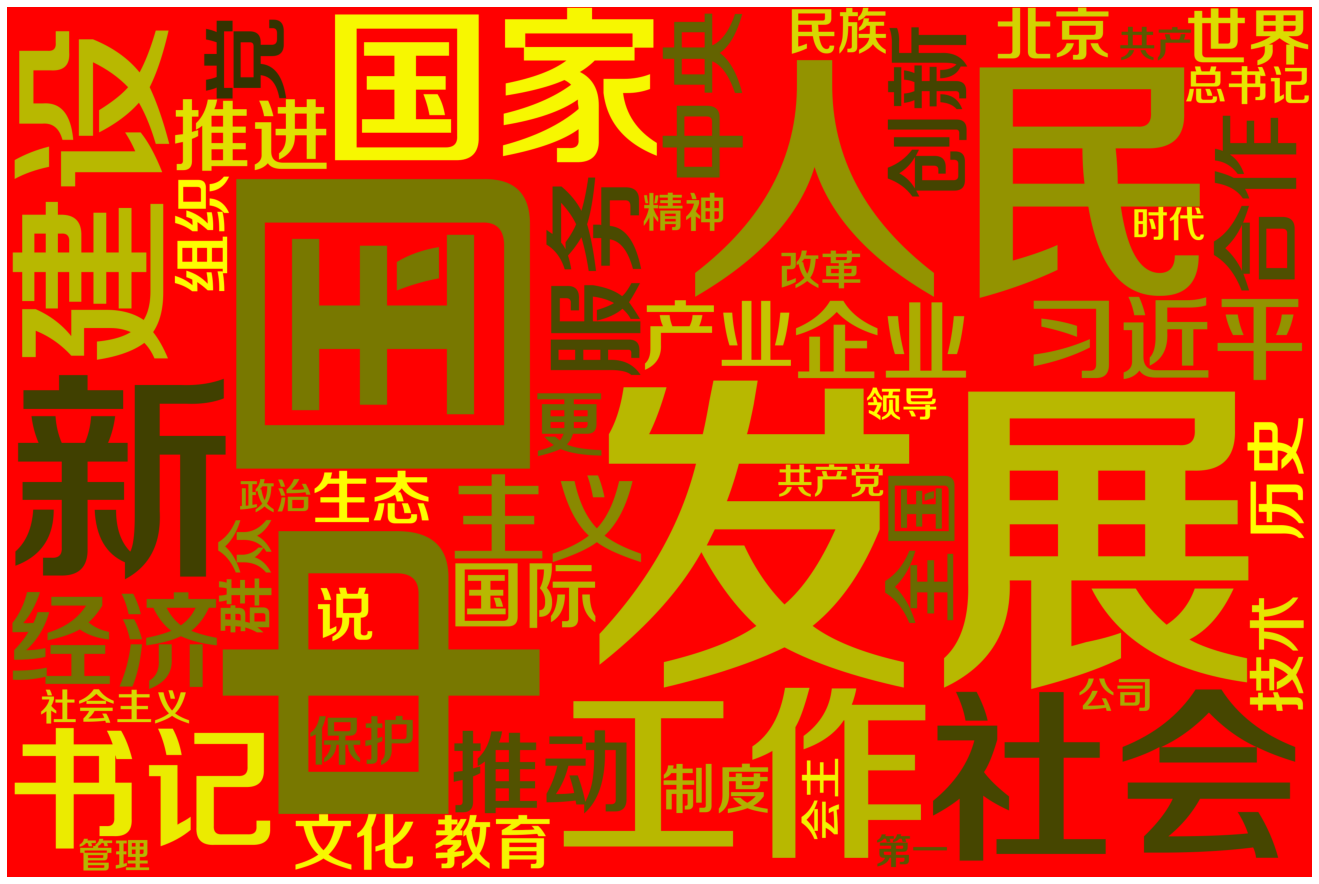

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(word_count)

wc.to_file("People's Daily WordCloud Zh.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Zh.png"))
plt.axis("off")
plt.show()

### 2.4 translate to English with YouDao API

In [22]:
import json
import requests
import re

def translator(str):
    """
    input : str
    output：translation
    """
    # API
    url = 'http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule&smartresult=ugc&sessionFrom=null'
    key = {
        'type': "AUTO",
        'i': str,
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "ue": "UTF-8",
        "action": "FY_BY_CLICKBUTTON",
        "typoResult": "true"
    }
    # key
    response = requests.post(url, data=key)
    if response.status_code == 200:
        
        result = json.loads(response.text)
        translation = result['translateResult'][0][0]['tgt']
        return translation
    else:
        print("failed to use 有道 API")
        return None


In [23]:
translator('英文')

'English'

In [24]:
import re
def removeElse(s:str):
    pattern=r'^The \b|^To \b|\b of$|\b of the$|\b the$|^At the\b|\b are$'
    return re.sub(pattern,"",s)


In [25]:
En_word_count={}
for word in word_ds.head(50).index:
    En_word_count[removeElse(translator(word))]=word_count[word]
 
En_word_ds=pd.DataFrame(En_word_count,index=[0])
En_word_ds=En_word_ds.T
En_word_ds.columns=['count']

En_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
En_word_ds.head(20)

,count
China,58188
development,56561
people's,31197
new,29259
work,28369
social,28019
countries,27305
construction,27245
secretary,24628
economic,20753


### 2.5 create English WordCloud

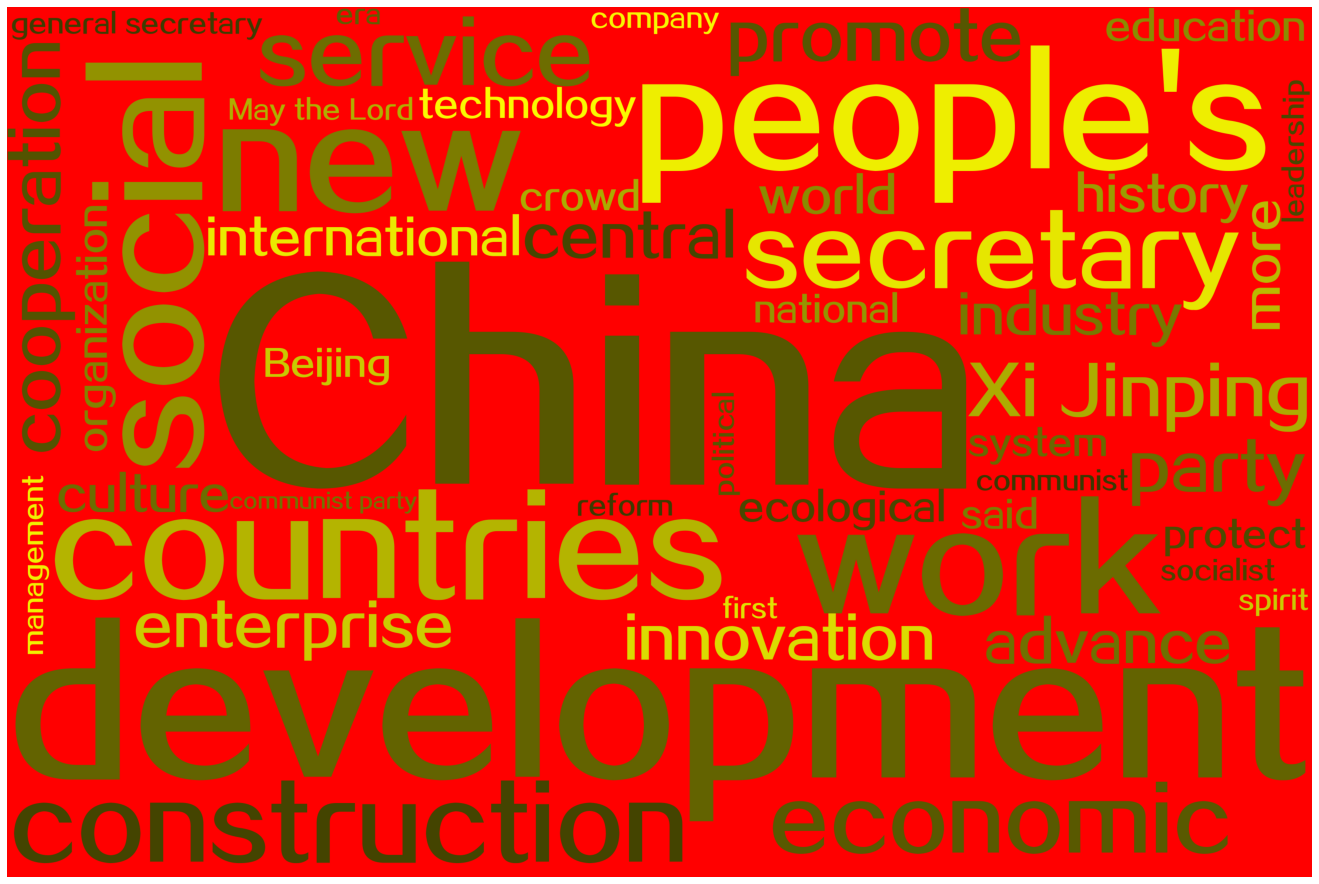

In [26]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(En_word_count)

wc.to_file("People's Daily WordCloud English.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud English.png"))
plt.axis("off")
plt.show()

## 3. mix English and Chinese and generate WordCloud

In [27]:
from random import choice
Rand_word_count={}
for word in word_ds.head(50).index:
    if choice(['En','Zh']) == 'En':
        Rand_word_count[removeElse(translator(word))]=word_count[word]
    else:
        Rand_word_count[word]=word_count[word]
        
Rand_word_ds=pd.DataFrame(Rand_word_count,index=[0])
Rand_word_ds=Rand_word_ds.T
Rand_word_ds.columns=['count']

Rand_word_ds.sort_values(by=['count'],ascending=False,inplace=True)
Rand_word_ds.head(20)

,count
中国,58188
发展,56561
people's,31197
新,29259
工作,28369
社会,28019
countries,27305
construction,27245
secretary,24628
economic,20753


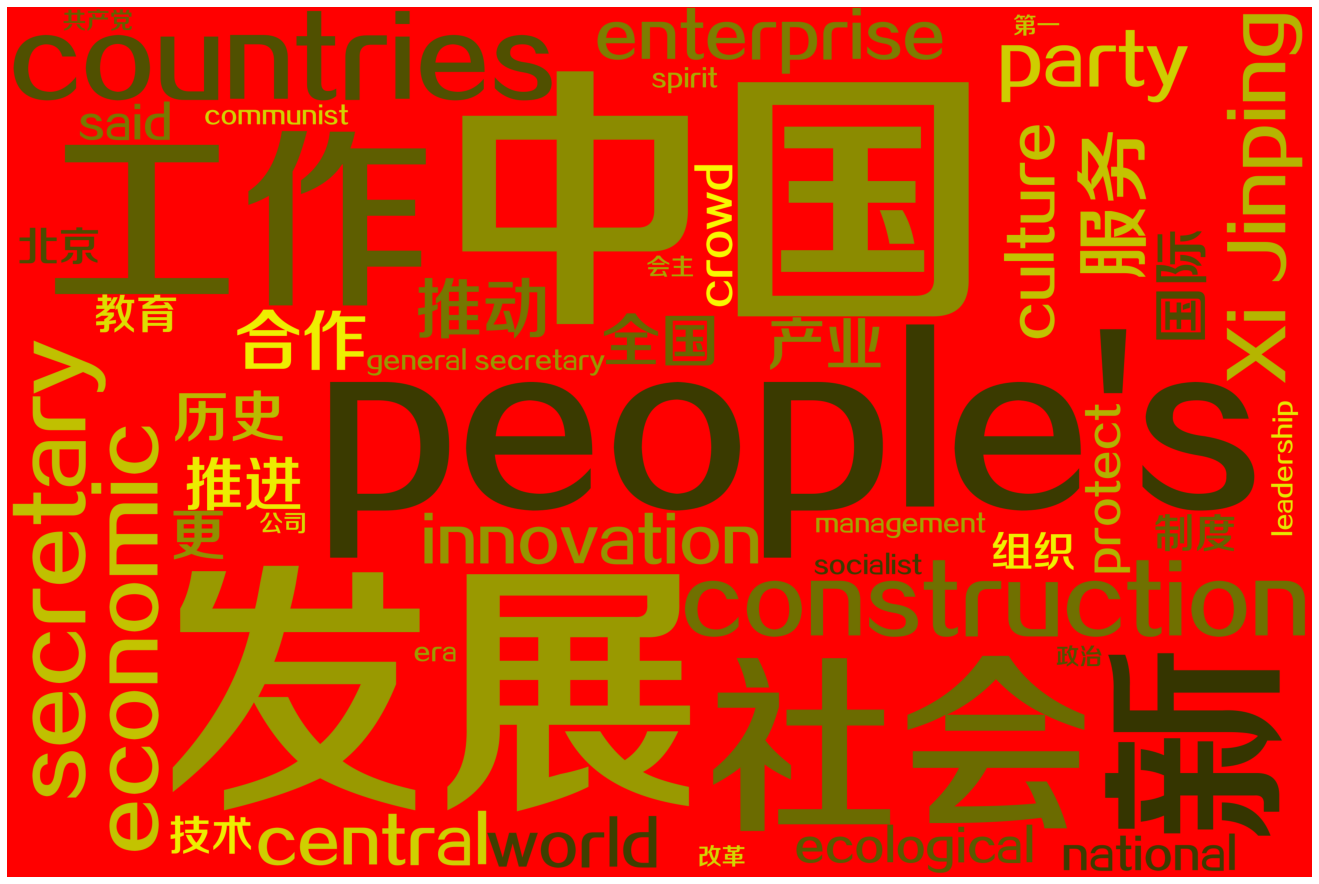

In [28]:
wc = WordCloud(font_path='../input/fonts-on-mac/Fonts/方正正中黑简体.TTF',width=3000,height=2000,background_color="red", max_words=50,color_func=wordcloud.get_single_color_func("yellow"))
wc.generate_from_frequencies(Rand_word_count)

wc.to_file("People's Daily WordCloud Both Zh and En.png")

plt.figure(figsize=(24,16))
plt.imshow(plt.imread("./People's Daily WordCloud Both Zh and En.png"))
plt.axis("off")
plt.show()